In [2]:
from IPython.display import display, Image, clear_output
import pandas as pd
import random 
import re 
import numpy as np
import music21 as m21
import time
import datetime
import nltk 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

ModuleNotFoundError: No module named 'pandas'

In [3]:
pip install pandas

  Using cached https://files.pythonhosted.org/packages/56/dd/9676967eac629273b2da40c53845f28d58af1800940d9b4067fc9a735dfb/pandas-1.3.4-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d3/e3/d9f046b5d1c94a3aeab15f1f867aa414f8ee9d196fae6865f1d6a0ee1a0b/pytz-2021.3-py2.py3-none-any.whl
     |████████████████████████████████| 16.9MB 9.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install music21

  Using cached https://files.pythonhosted.org/packages/7d/59/80c5d3c437acbbb587770df10961d603df9b4e619bcd6944ebd0aea55550/music21-7.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/19/c7/fa589626997dd07bd87d9269342ccb74b1720384a4d739a1872bd84fbe68/chardet-4.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3e/d5/0163eb0cfa0b673aa4fe1cd3ea9d8a81ea0f32e50807b0c295871e4aab2e/joblib-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/1a/f2db026d4d682303793559f1c2bb425ba3ec0d6fd7ac63397790443f2461/jsonpickle-2.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/fe/30a42edcdaf7cb809782310c90817dbe7121fc32304b80a7776e3ba2dc53/matplotlib-3.4.3-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e0/1f/9cd11889680dc55a3612a277c8310def3f2bfc7159f12fcb647e32350380/more_itertools-8.10.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packa

# 200806695 MSC Project

## An intelligent tutoring system (ITS) for music theory teaching

### Part 1 - a non intelligent tutoring system

#### Loading the questions data

 The questions are png images of notes on a stave that were generated with the music21 library. Below is a table which can be used to access the png image for the questions (or the xml if need be).

In [2]:
# data = './q_folders/stave/labels_treble.csv'
# data = pd.read_csv(data)
# data.head()


Below is an example of how data from the table can be used to generate a question and answer from the database.

In [3]:
# data = './q_folders/transpose/bb/labels.csv'
# # data = './q_folders/stave/labels_treble.csv'
# data = pd.read_csv(data)
# data.head()


In [4]:
# #random number between 0 and the length of the table
# rand_ex = random.randint(0,len(data)-1)

# file, label = data.iloc[rand_ex, 1], data.iloc[rand_ex, 2]
# print ("The file is called {} and the answer is {}" .format(file, label))
# display(Image(filename='./q_folders/transpose/bb/' + file))

Now that we have a database of answers we can ask a user a question at random and see if they get it correct.


In [5]:
# def identificationOpen(data): 
#     qs = pd.read_csv(data)
    
#     score = 0
#     total = 0
#     combo = 0 
    
#     while True:
        
#         clear_output(wait=True)
        
#         print ('Answer with letters A - G, type stop to end the game')
#         print (score, '/', total)
#         print ('combo:', combo)
                
#         #get q at random
#         ex = random.randint(0,len(qs)-1)
#         file, label = qs['pngfile'][ex], qs['label'][ex]  
        
#         print ('What note is this? \n')

#         display(Image(filename='./q_folders/stave/' + file))

#         answer = input('')
    
#         #noramlise text
#         answer = answer.upper()
#         answer = answer.strip()

#         if answer == label:
#             print ("Well done!")
#             score += 1
#             total += 1
#             combo += 1

#             continue

#         if answer == 'STOP':
#             if total == 0:
#                 return ('done')
#             else:
#                 print ('You score', round(((score/total)*100), 2), '%')
#                 return score
#         else:
#             print("incorrect, try again")
#             total += 1
#             combo = 0

In [6]:
#get bank of questions
data = './q_folders/stave/labels_treble.csv'

#ask q's
# identificationOpen(data)

 There are a few limitations with this simple game which prevent it from being an ITS:
 
 1. It will sometimes pick the same question twice in a row (there is no need to do this if the student answered correctly).
 2.  It picks at random and therefore jumps between questions which could be confusing for a beginner.
 3. It doesn't know which exercises the student is struggling with in particular and has no strategy for helping them to learn. 


### Part 2: Lower level strategies for an ITS

According to John Self, an ITS is

*‘… [a] computer-based learning system which has some degree of autonomous decision-making with respect to some aspect of its interaction with its users’* (1995) 

 We will now try to get the system to make *intelligent* and autonomous decisions about which questions to present that aim to overcome the aforementioned limitations that should be more effective for the user. 
 
  The system will implement the following lower level strategies:
  
1. Ask the same question again if the student gives a wrong answer so that the user can learn where they went wrong
2. Pick questions based on probabilities: <br>
    2.1: If the student has answered a question correctly it is half as likely they will be asked that same exercise again <br>
    2.2: Conversely, if they answer a question incorrectly it is twice as likely they will be asked that question again
3. If the success rate is below 80% only move one question up/down at a time to prevent large jumps confusing the student (this only works for ordinally ordered exercises

These autonomous decisions and the idea of 'low level strategies' have been inspired directly from the paper 'A System for Concerned Teaching of Musical Aural Skills' by Wiggins (2000, p4). 

_______

## scoreCard function

Below is a function which will keep a score of the questions answered correctly/incorrectly. It will also give question probabilities for the method to use. It does not actually return anything unless the session has ended in which case it returns the table of answers and probabilities that it has been building up. This data can be saved to help build a profile of the user that can be accessed later if desired.

In [7]:
def scoreCard(qs, student_no=None, init=False, finished=None, question=None, correct=None, update_probs=True):
    
    if init == True:

        #make new columns, initialise with 1 to avoid division by zero error
        qs['#_attempts'] = 1
        qs['#_correct'] = 1

        #add probabilities to dataframe
        qs['probability'] = qs['#_attempts'] / qs['#_correct']
        qs['probability'] = qs['probability'] / qs['probability'].sum()
        
    if correct == True:

        #correct
        qs.loc[qs.index.values == question, '#_attempts'] += 1
        qs.loc[qs.index.values == question, '#_correct'] += 1
        
    if update_probs and correct == True:

        #subtract probability mass from question
        qs.loc[qs.index.values == question, 'probability'] = (qs.loc[qs.index.values == question, 'probability'] / 2)
        
    if correct == False:

        #incorrect
        qs.loc[qs.index.values == question, '#_attempts'] += 1
        
    if update_probs and correct == False:

        #add probability mass to question  
        qs.loc[qs.index.values == question, 'probability'] = (qs.loc[qs.index.values == question, 'probability'] * 2)
        
    #normalise probabilities
    qs['probability'] = qs['probability'] / qs['probability'].sum()
    probabilities = qs['probability'].to_numpy() #variable to be accessed by method

    if finished == True:
        
        #minus the 1 that we added earlier to avoid division by zero 
        qs['#_attempts'] -= 1
        qs['#_correct'] -= 1
        
        time_stamp = datetime.datetime.now().strftime('%c')
        time_stamp = str(time_stamp)
        time_stamp = time_stamp.replace(':', '-')
        
        file_name = '{}_{}_.csv'.format(student_no, time_stamp)
        qs.to_csv(file_name, index=False)
        return 

 With the above function the system has the data to make intelligent decisions based on probabilities. However, we've not yet got a function to select a question based on the probabilities. 

## generateQ function 

generateQ can be used to: 

1. Slice a database of q's (for instance just the treble clef notes as opposed to bass and treble clef) 
2. Exclude certain questions
3. Specify an interval between q's (to avoid jumps that cause difficulty in the case of ordinal questions) 
4. Generate a q based on a previous q (for example sticking to a certain subset)
5. Draw a question based on the probabilities from the score card


In [8]:
def generateQ(q_index, combo, score, total, probabilities, ex=None, interval=False): 

    if interval == True:
        ex = ex + np.random.choice(np.arange(-1,2), p=[1/2,0,1/2])
#         ex = ex + generateQ(q_index, probabilities, init=False, interval=True)
        
#     #ask again if they got last q wrong
        return ex

    else: 
        #draw from probabilities
#         ex = generateQ(q_index, probabilities, init=False, interval=False)
        ex = np.random.choice(q_index, p=probabilities)

    return ex


## answerCleanup function

answerCleanup will remove leading whitespace and convert all letters to capitals to reduce the chance of a user entering an invalid answer. It can also take regex. It will output 'invalid' if the answer is not valid. It can be modified for different exercises/curricula

In [9]:
def answerCleanup(answer, regex=None, method=None):
            
    if method == 'generative_int':
        answer = answer.strip()
        return answer
    
    if method == 'generative_note' or method == 'notes_advanced':
        answer = answer.replace(' ', '')
        answer = answer.upper()
        
        regex = r"[a-gA-G 0-9\#\b]"
        
    if regex: 

        p = re.compile(regex)
        m = p.match(answer)

        if m:
            return answer
        else:
            return 'invalid'
    
    else:
        return answer

In [10]:
regex = r"[a-gA-G 0-9\#\b]"
answer = 'bb f# e#'
answerCleanup(answer, method='generative_note') #this will return 'invalid' as the letter H is not between A-G


'BBF#E#'

In [11]:
answerCleanup('m2', method='intervalTraining')

'm2'

## Higher level teaching methods

 In line with the ideas presented by Wiggins in his 2000 paper, we will now implement a function to teach our first higher level teaching method: identificationOpen. This will be presented via a simple game where the user simply has to identify the correct answer without any prompts. 


## Generative question functions

 These functions take advantage of the music21 library.

### Generative interval

In [12]:
def generative_int(down=True, qs=None, ex=None):
    
    interval = qs['label'][ex]
    answer = qs['label'][ex]
    
    pitches = ['F2','G2','A2', 'B2',
            'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3',
            'C4', 'D4', 'E5', 'F5', 'G5']

    p1 = m21.pitch.Pitch(random.choice(pitches)) #pitch1 
    n1 = m21.note.Note(p1) #create note1 from pitch1
    n1.duration.quarterLength = 2
    if down == True:
        p2 = random.choice([p1.transpose('-' + interval), p1.transpose(interval)])
#         p2 = p1.transpose('-' + q) #transpose down
    else:
        p2 = p1.transpose(interval) #transpose up

    #p2.nameWithOctave #if you want to check
    n2 = m21.note.Note(p2) #create note2 from transposed pitch1
    n2.duration.quarterLength = 2

    s = m21.stream.Stream() #create stream
    s.append(n1) #add notes to stream
    s.append(n2)

    return s, answer

## Generative stave notation

In order for this function to work it has to be presented with the exact note to display

In [13]:
def generative_note(ex=None, qs=None, data=None):
    
    #note = qs['note'][ex] #needs to be note variable for m21
    
    note_values = ['whole', 'half', 'quarter', 'eighth']
    
    clef = qs['clef'][ex]
    
    if clef == 'TrebleClef':
        clef = m21.clef.TrebleClef()
    if clef == 'BassClef':
        clef = m21.clef.BassClef()
        
    answer = qs['label'][ex]
    
#     ks = m21.key.KeySignature(int(qs['ks'][ex]))
    
#     alteredPitches = [str(p) for p in ks.alteredPitches]    

    s = m21.stream.Measure([clef])
#     s.insert(0, ks)
    ts1 = m21.meter.TimeSignature('4/4')
    ts1.symbol = 'None'
    s.append(ts1)
    
    p1 = m21.pitch.Pitch(qs['pitches'][ex]) #pitch1 
    
#     if p1.accidental:
#         p1.accidental = None
        
#     if note[0:2] in alteredPitches and p1.accidental == True:
#          p1.accidental = None
#     else:
#         pass
    
    n1 = m21.note.Note(p1, type=random.choice(note_values)) #create note1 from pitch1
    s.append(n1) #add notes to stream
    
#     if transpose:
#         s.transpose(transpose)
        
    return s, answer

## Advanced generative stave notation

This can be used for harder exercises. Rather than generating an exact note it generates a note (or series of notes) according to certain parameters. It can also transpose. 

In [14]:
def notes_advanced(qs=None, ex=None, transpose=None):
    
    tonic = qs['tonic'][ex]
    clef = qs['clef'][ex]
    start_range = qs['start'][ex]
    end_range = qs['end'][ex]
    no_notes = qs['no_notes'][ex]
    
    #clef
    if clef == 'TrebleClef':
        clef = m21.clef.TrebleClef()
    if clef == 'BassClef':
        clef = m21.clef.BassClef()
        
    s = m21.stream.Measure([clef])
    #time sig
    ts1 = m21.meter.TimeSignature('4/4')
    ts1.symbol = 'None'
    s.append(ts1)
    #key
    k = m21.key.Key(tonic)
    s.append(k) #add key sig 
    
    #scale
    sc1 = m21.scale.MajorScale(tonic)
    
#     if transpose:
#         sc1 = sc1.transpose(transpose) #transpose notes
#     else:
#         pass
        
    pitches = [str(p) for p in sc1.getPitches(start_range, end_range)]
    notes = random.sample(pitches, no_notes)
#     notes = ' '.join([str(note) for note in notes])

    if transpose:
        k = k.transpose(transpose) #if you want to change the key signature
        # k.transpose(transpose) #if you want to change the notes but not the key, could be a param

    if transpose:
        sc1 = sc1.transpose(transpose) #transpose scale
    else:
        pass
    
#     print (notes)
    #transpose notes
    
    notes_list = []
    
    for note in notes:
        p = m21.pitch.Pitch(note)
        n = m21.note.Note(p, type='quarter') #create note1 from pitch1
        s.append(n)
        if transpose:
            p = p.transpose(transpose)
        else:
            pass
        notes_list.append(str(p.name).replace('-', 'B'))

        
    answer = notes_list

    return s, answer

In [16]:
# its()

<font color='red'> getting issues here with it printing an accidental even when its in the key sig!

tutorModule()
- student tells it what they want to do
- student can ask it to stop or move onto a new game or reset the score etc (stop function should not be in the identificationOpen etc)
- the module CALLS ON THE METHOD with data (and probabilities, other params etc) to return a question and an answer
- if a student gets it correct, it can call on the method again perhaps with harder params. if the answer is wrong, it will not call on the method again... it will just ask again and update the scoreCard etc
- so the scoreCard is a variable held by the tutor module. if finished the scoreCard can be called upon to save the CSV
- the module can then get the answer from the student and compare if it is correct and update scores accordingly. it can also act on these scores (if they are low it can change method etc)
- the general direction of the game and the lower level teaching strategies come from the tutorModule, not the identificationOpen


 
 ## game function
 
 Most teaching will be presented in the format of an interactive game. The game function acts as an empty shell and can take the data (aka the paramteres) and the (generative) method as input. 
 
 - Instructions: tell the user how to play the game, what to enter etc
 - Prompt: Essentially the question ('what interval did you hear?'
 - regex: To ensure that the answer given is less likely to return an error ('a becomes A')
 - min_q: the interval at which the game will check for progress and give it an opportunity to act
 - pass threshold: the minimum score needed to progress
 - difficulty: a way of slicing dataframes for harder q's

In [17]:
def game(data, instructions, prompt, method, student_no, min_q=5, pass_threshold=0.9, down=False, 
         blind=True, difficulty=None, transpose=None):
    
    times = []
    
    #convert csv of qs to dataframe
    qs = pd.read_csv(data + 'labels.csv')
    
    #slice data to q's according to difficulty
    if difficulty:
        qs = qs.loc[qs['difficulty'] == difficulty].reset_index(drop=True)
    else:
        pass
    
    #initialise score card based on csv of questions, get init probabilities (random)
    scoreCard(qs, init=True)
    probabilities = qs['probability']
    
    #the index will be used by generateQ to choose questions 
    q_index = qs.index.values
    
    #initialise local variables to track scores and give instant feedback
    score = 0
    total = 0
    combo = 0 
    
    #feedback is used to help guide the student
    feedback = "Okay, here we go"
    
    finished = False
    
    previous_correct = True
    
    #first loop: pick a question using lower level strategies
    while True:

        #ask again if previous answer incorrect
        if total == 0:
            ex = generateQ(q_index=q_index, score=score, combo=combo,total=total,
                        interval=False, probabilities=probabilities)
            
        #restrict to interval in case of ordinal q's
        elif score/total < 0.8:
            ex = generateQ(ex=ex, q_index=q_index, score=score, combo=combo,total=total,
                        interval=True, probabilities=probabilities)
            
        #draw from probabilities
        else:
            ex = generateQ(q_index=q_index, score=score, combo=combo, total=total,
                        interval=False, probabilities=probabilities)
#             continue

        #second loop: present the question, get answer, update scores and probabilities
        while True:

            if total > 0 and total % min_q == 0 and score/total > pass_threshold:
                answer = input('''You\'re doing well, do you want to:
                1. end the game and try something new or
                2. continue playing?
                Type 1 or 2 )''')
                
                while True:

                    answer = answer[0]
                    answer = answerCleanup(answer, regex="[1-2]")
                    
                    if answer == 'invalid':
                        print ('invalid answer, type 1 or 2')
                        continue
                        
                    else:

                        if answer == '1':
                            finished = True
                            break
                        
                        if answer == '2':
                            break

#             print ('ex is {}'.format(ex))
#             print  (qs['label'])
            
#             label = qs['label'][ex] #correct answer 
            clear_output(wait=True)
            
            if finished == True: 
                scoreCard(qs, student_no, finished=True)
                return score/total
    
            print (feedback, '\n \n {} \n'.format(instructions)) #this could be a prompt?
            # and the prompt could be different things depending on how the game is going and the curricula

            print (score, '/', total)
            print ('combo:', combo)
                        
            #ASK QUESTION
            if method == 'generative_note':
                s, label = generative_note(qs=qs, ex=ex)
                s.show()
                
            if method == 'notes_advanced':
                s, label = notes_advanced(
                    ex=ex, qs=qs, transpose=transpose)
                s.show()
                
                label = ''.join(str(note).upper() for note in label)
                print (label)
                
            if method == 'generative_int':
                if previous_correct == False:
                    pass
                else:
                    s, label = generative_int(down=True, ex=ex, qs=qs)
                if blind == False:
                    s.show() #show music
                else:
                    pass
                sp = m21.midi.realtime.StreamPlayer(s) 
                sp.play()
                
            print (prompt) 
            #GET ANSWER
            start_time = time.time()
            answer = input('') #hash out to compute answer automatically 
            inputs.append(answer)

            if answer == 'stop': 
                finished = True
                continue

#                 if total == 0:
#                     return ('No questions answered')
#                 else:
#                     print ('You score', round(((score/total)*100), 2), '%')
#     #                 return score
#                     return scoreCard(qs, finished=True)
            
            answer = answerCleanup(answer, method=method) #unhash to test answer
        
            if answer == label:
                end_time = time.time()
                time_lapsed = end_time - start_time
                times.append(time_lapsed)
                
                score += 1
                total += 1
                combo += 1
                previous_correct = True

                if input('Well done! Press enter to continue.') == '':
                    pass
                if previous_correct == True:
                    scoreCard(qs, question=ex, correct=True, update_probs=True)
                    break
                
                #do not update probabilities if last question was incorrect
                if previous_correct == False:
                    scoreCard(qs, question=ex, correct=True, update_probs=False)
                    break
    
            if answer == 'invalid':
                if input('WARNING: Invalid answer.') == '':
                    pass
        
                continue

            else:
                total += 1
                combo = 0
                previous_correct = False
                scoreCard(qs, question=ex, correct=False, update_probs=True)
                if input('Incorrect - press enter to try again.') == '':
                    pass
                
                continue

## its() and subjectSelect() module

The tutorModule will guide the user through the different teaching strategies and act as a rules based chatbot. It will implement some standard NLP approaches such as the preprocessing of text and stemming/lemmatization. It mostly works through a 'bag of words' type model to understand the users intentions. 

In [26]:
#key words for different subjects (bag of words)
notation = ['notes', 'clef', 'reading', 'notation']
interval = ['interval', 'distance', 'major', 'minor']
transposition = ['transpose', 'trumpet', 'instruments', 'transposition']

#preProcess lists
notation = preProcessList(notation)
interval = preProcessList(interval)
transposition = preProcessList(transposition)


In [27]:
def preProcess(word):
    porter = PorterStemmer()
    Lem = WordNetLemmatizer()

    word = Lem.lemmatize(word)
    word = porter.stem(word)
    return word

def preProcessList(lst):
    words = []
    for word in lst:
        word = preProcess(word)
        words.append(word)
        
    return words

In [28]:
#identification method

method = 'generative_note'
instructions = 'Answer with letters A-G. Type stop to end the game'
regex = r"[a-gA-G 0-9\#\b]"
prompt = 'What pitch is displayed on the clef?'
data = '/q_folders/g1_treble_'



In [29]:
#interval method
method = 'generative_int'
instructions = 'Enter your answer with 2 chars only'

data = '/q_folders/interval_'
prompt = 'Which interval did you hear?'


In [30]:
def subjectSelect(greeting, student_no):

    while True:
        
        #parse input
        tokens = greeting.split()

        for token in tokens:
            token = preProcess(token)



            #subject select
            if token in notation:
                print ('Okay, would you like to train on the treble or bass clef?')

                method = 'generative_note'
                instructions = 'Answer with letters A-G. Type stop to end the game'
                regex = r"[a-gA-G 0-9\#\b]"
                prompt = 'What pitch is displayed on the clef?'

                answer = input()
                if answer == 'treble':
                    ('Okay, lets do notes on the treble clef')
                    data = './q_folders/g1_treble_' #treble
                    score = game(data, instructions, prompt, method, student_no,
                                min_q=5, pass_threshold=0.9) #start game

                if answer == 'bass':
                    ('Okay, lets do notes on the bass clef')
                    data = './q_folders/g1_bass_' #bass
                    score = game(data, instructions, prompt, method, student_no,
                                min_q=5, pass_threshold=0.9) #start game

                if score < 0.5:
                    print ('You should try something easier')
                if score > 0.5:
                    print ('You should try something harder')


    #             if answer == 'alto':
    #                 ('Okay, let\s do notes on the alto clef.')
    #                 identificationOpen('./q_folders/altoclef/')

            if token in interval:
                print ('Okay, let\s do interval training')

                #interval method
                method = 'generative_int'
                instructions = 'Enter your answer with 2 chars only'
                data = './q_folders/interval_'
                prompt = 'Which interval did you hear?'

                difficulty = 1

                while True:

                    next_instruction = game(data, instructions, prompt, method, student_no,
                                            min_q=5, pass_threshold=0.5, difficulty=difficulty) #start game

                    if next_instruction == 'level_up':
                        difficulty += 1
                        continue
                    if next_instruction == 'stop':
                        break 



            if token in transposition:

                print ('Okay, let\s do transposition')
                data = './q_folders/transposition_'
                prompt = 'What is the sounding pitch of this note for a Bb instrument?'
                instructions = 'Answer with letters A-G. Type stop to end the game'
                method = 'notes_advanced'
                transpose = 'm2'
                difficulty = 2
                return game(data, instructions, prompt, method, student_no, transpose='-M2',
                                             pass_threshold=0.5, difficulty=difficulty)

                if next_instruction == 'level_up':
                    data = './q_folders/transpose/eb/'
                    return game(data, instructions, prompt, 'identificationOpen')

        return 'invalid'


In [31]:
def its():
    
    global inputs
    inputs = []
    
    student_no = input('Please enter your username')
    inputs.append(student_no)
    
    while True:
        print ('Thanks, {}. What do you want to learn today?'.format(student_no))
        print ('Type stop to end the session')
        answer = input()
        inputs.append(answer)
        if answer == 'stop':
            print (inputs)
            break
        else:
            subjectSelect(answer, student_no=student_no)

Okay, here we go 
 
 Answer with letters A-G. Type stop to end the game 

0 / 0
combo: 0


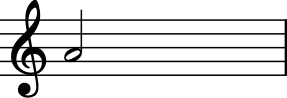

What pitch is displayed on the clef?


KeyboardInterrupt: Interrupted by user

In [33]:
its()

In [26]:
# intervalTraining(blind=False, difficulty='easy', down=True)

_________

In [34]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [27]:
def tutorModule(student=None):
    
    if student == None:
        
        print ('Hello, you must be new here. What is your name?')
        name = input()
        print ('Hello {} - what would you like to learn today?'.format(name))
        print (modules)
        subject = input()
        
        if subject == 'Notes on treble clef':
            data = './q_folders/stave/'
        else:
            data = './q_folders/altoclef/'
            
        score = identificationOpen(data)
        
        if score < 0.5:
            
            identificationClosed(data)

In [34]:
tutorModule()

Hello, you must be new here. What is your name?


 stop


Hello stop - what would you like to learn today?


NameError: name 'modules' is not defined

## notes on tutor module

- work a stop mechanism into all methods that returns the final score (can even be a paramater, max number of q's to ask? so that it does not go on infinitely?)
- get the bot to take the final percentage in (say below 50%) and choose a new method based on that?
- could do it via variable 'finish', so if finish == True: return scoreCard and score/total? and that will decide next thing to do.
- things such as max no of questions or a score boundary could decide if finished is true or not  

In [35]:
# identificationClosed(data)

In [36]:
def identificationOpen(data): 
    
    #convert csv to dataframe
    qs = pd.read_csv(data)
    
    #initialise score card 
    scoreCard(qs, init=True)
    
    score = 0
    total = 0
    combo = 0 

    while True:
        
        clear_output(wait=True)

        print ('Answer with letters A - G, type stop to end the game')
        print (score, '/', total)
        print ('combo:', combo)
                
        #check for init
        if total == 0:
            ex = random.randint(0,len(qs)-1)
        
        #ask again if they got last q wrong
        elif combo == 0:
            ex = ex 
           
            
        elif score/total < 0.8:
            #interval up/down 1
            ex = ex + np.random.choice(np.arange(-1, 2), p=[1/2, 0, 1/2])
        else: 
            #draw from probabilities
            ex = np.random.choice(qs.index.to_numpy(), p=qs['probability'])
        
        try:    
            file, label = qs['pngfile'][ex], qs['label'][ex]  
        except KeyError:
            print ('There was a key error')
            continue

        print ('What note is this? \n')

        display(Image(filename='./q_folders/stave/' + file))

        answer = input('')

#         answer = qs['label'][ex]
    
        #noramlise text
        answer = answer.upper()
        answer = answer.strip()

        if answer == label:
            print ("Well done!")
            score += 1
            total += 1
            combo += 1

            scoreCard(qs, question=file, correct=True)
            continue

        if answer == 'STOP':
            if total == 0:
                return ('done')
            else:
                print ('You score', round(((score/total)*100), 2), '%')
#                 return score
                return scoreCard(qs, finished=True)

        else:
            print("incorrect, try again")
            total += 1
            combo = 0
            
            scoreCard(qs, question=file, correct=False)

#             return qs

In [38]:
# intervalTraining(blind=True, difficulty='medium', down=False)

<font color = 'red'> IMPORTANT teaching aspect: can it teach them what they are often mistaking some intervals for? This could be applicable to anything and perhaps work via the scoreCard function

In [39]:
qs = pd.read_csv('./q_folders/interval/labels.csv')
qs#['interval']#.to_list()
new = qs.loc[qs['difficulty'] == 1].reset_index(drop=True)
new.index += 1
new

,label,difficulty
1,M3,1
2,P5,1
3,P8,1


In [40]:
print('Which interval did you hear? Type any of the following: \n', *new.interval.to_list())

AttributeError: 'DataFrame' object has no attribute 'interval'

In [41]:
for i in range(len(new)):
    print (new.index[i], new.interval[i])

AttributeError: 'DataFrame' object has no attribute 'interval'

In [42]:
new.interval

AttributeError: 'DataFrame' object has no attribute 'interval'

## TODO:

1. Should 'prompt' or 'feedback' be a constantly chagnging variable dependent on prev answer/the answer to the current q? Maybe they should both be variables. 

generateQ(data=(index or dataframe), init=None, range=None, probabilities=1d array)


Interface: Make sure it gives some instant feedback 

Can it be smart choosing which intervals to go between?

If a student is consistently struggling ask questions the system knows they got right to build confidence/change method or strategy. Conversely, if a student is doing really well start to challenge them more. 

Next step: start **teaching** as opposed to testing. Flash cards, mnemonic, prompts etc. 



In [43]:
def identificationOpen(data): 
    qs = pd.read_csv(data)
    
    qs['#_attempts'] = 1
    qs['#_correct'] = 1
    qs ['probability'] = qs['#_attempts'] / qs['#_correct']
    qs['probability'] = qs['probability'] / qs['probability'].sum()
    
    score = 0
    total = 0
    combo = 0 

    while True:
        
        clear_output(wait=True)

        print ('Answer with letters A - G, type stop to end the game')
        print (score, '/', total)
        print ('combo:', combo)
                
        #check for init
        if total == 0:
            ex = random.randint(0,len(qs)-1)
        
        #ask again if they got last q wrong
        elif combo == 0:
            ex = ex 
            
        #interval of no more than 1
        elif score/total < 0.8:
            ex = ex + np.random.choice(np.arange(-1, 2), p=[1/2, 0, 1/2])
        else: 
            ex = np.random.choice(qs.index.to_numpy(), p=probabilities)
        
        try:    
            file, label = qs['pngfile'][ex], qs['label'][ex]  
        except KeyError:
            print ('There was a key error')
            continue

        print ('What note is this? \n')

        display(Image(filename='./q_folders/stave/' + file))

        answer = input('')

#         answer = qs['label'][ex]
    
        #noramlise text
        answer = answer.upper()
        answer = answer.strip()

        if answer == label:
            print ("Well done!")
            score += 1
            total += 1
            combo += 1

            #correct
            qs.loc[qs['pngfile'] == file, '#_attempts'] += 1
            qs.loc[qs['pngfile'] == file, '#_correct'] += 1

            #updates probabilities 
#             qs['probability'] = qs['#_attempts'] / qs['#_correct']
            qs.loc[qs['pngfile'] == file, 'probability'] = (qs.loc[qs['pngfile'] == file, 'probability'] / 2)
            qs['probability'] = qs['probability'] / qs['probability'].sum()
            probabilities = qs['probability'].to_numpy()

            continue

        if answer == 'STOP':
            if total == 0:
                return ('done')
            else:
                print ('You score', round(((score/total)*100), 2), '%')
#                 return score
                return qs
        else:
            print("incorrect, try again")
            total += 1
            combo = 0
            
            #incorrect
            qs.loc[qs['pngfile'] == file, '#_attempts'] += 1
            # qs.loc[qs['pngfile'] == file, '#_correct'] += 1

            #updates probabilities 
            # qs ['probability'] = qs['#_attempts'] / qs['#_correct']
            qs.loc[qs['pngfile'] == file, 'probability'] = (qs.loc[qs['pngfile'] == file, 'probability'] * 2)
            qs['probability'] = qs['probability'] / qs['probability'].sum()
            probabilities = qs['probability'].to_numpy()

            
#             return qs


Below is also a detailed log of which questions were answered correctly and incorrectly which is constructed from the question table.  This data could be saved and used the next time the method is used for teaching and to contribute to the overall profile of the student. 

__________

In [ ]:
def identificationClosed(data): 
    qs = pd.read_csv(data)

    score = 0
    total = 0
    combo = 0 

    while True:

        clear_output(wait=True)

        print (score, '/', total)
                
        #check for init
        if total == 0:
            ex = random.randint(0,len(qs)-1)
        
        #ask again if they got last q wrong
        elif combo == 0:
            ex = ex 
            
        #interval of no more than 1
        elif score/total < 0.8:
            ex = ex + np.random.choice(np.arange(-1, 2), p=[1/2, 0, 1/2])
        else: 
            ex = ex + np.random.choice(np.arange(-3, 4), p=[1/4, 1/4, 0, 0, 0, 1/4, 1/4])
        
        try:    
            file, label = qs['pngfile'][ex], qs['label'][ex]  
        except KeyError:
            print ('There was a key error')
            continue
        
        try:
            print ('Is this note ' + label + ' or ' + qs['label'][ex + np.random.choice([1,3,5])])
            
        except KeyError:
            print ('Is this note ' + label + ' or ' + qs['label'][ex - np.random.choice([1,3,5])])

        display(Image(filename='./q_folders/stave/' + file))

        answer = input('')

#         answer = qs['label'][ex]
    
        #noramlise text
        answer = answer.upper()
        answer = answer.strip()

        if answer == label:
            print ("Well done!")
            score += 1
            total += 1
            combo += 1
            continue

        if answer == 'STOP':
            if total == 0:
                return ('done')
            else:
                print ('You score', round(((score/total)*100), 2), '%')
                return score
        else:
            print("incorrect, try again")
            total += 1
            combo = 0
            


In [ ]:
data = './q_folders/stave/labels.csv'
# method = identificationOpen
identificationClosed(data)

In [ ]:
qs = pd.read_csv(data)
qs
# len(qs)

In [ ]:
import re
 
# Function to check if a string
# contains only special characters
def onlySpecialCharacters(Str):
 
    # Regex to check if a string contains
    # only special characters
    regex = r"a-gA-g 0-9\#\b"
 
    # Compile the ReGex
    p=re.compile(regex)
 
    # If the string is empty
    # then print No
    if(len(Str) == 0):
        print("No")
        return
 
    # Print Yes If the string matches
    # with the Regex
    if(re.search(p, Str)):
        print("Yes")
    else:
        print("No")
 

 
# Given string str
Str = 
 
# Function Call
onlySpecialCharacters(Str)
 

In [ ]:
def answerCleanup(answer, regex, warning):
    answer = answer.strip()
    answer = answer.upper()

    regex = r"[a-gA-G 0-9\#\b]"
    p = re.compile(regex)
    m = p.match(answer)
    
    if m:
        return answer
    else:
        return warning

In [ ]:
warning = 'Invalid character in answer. Only letters A-G allowed. Use # for sharp, lowercase b for flat.'
answerCleanup('H', regex="[a-gA-G 0-9\#\b]", warning=warning)

In [ ]:
s = 'hello world'
s.strip()

Can you edit it so that it can keep a detailed track of progress (like a dataframe) and save?